## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset


In [2]:
dataset = pd.read_excel('rainfall.xlsx', index_col = None, header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0


In [4]:
dataset.columns = ['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total']

In [5]:
dataset.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0


## Summarizing the dataset

In [6]:
print('Rows     :',dataset.shape[0])
print('Columns  :',dataset.shape[1])
print('\nFeatures :\n     :',dataset.columns.tolist())
print('\nMissing values    :',dataset.isnull().values.sum())
print('\nUnique values :  \n',dataset.nunique())

Rows     : 55
Columns  : 14

Features :
     : ['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total']

Missing values    : 0

Unique values :  
 Year         55
January      23
February     15
March        18
April        24
May          39
June         47
July         48
August       52
September    52
October      54
November     54
December     50
Total        54
dtype: int64


## Inserting the other dataset

In [7]:
flood = pd.read_excel('Flood.xlsx', index_col = None, header = None)

In [8]:
flood

,0,1
0,Flood occuring Year,Month(s) of occurence
1,2016,DEC
2,2015,OCT-DEC
3,2018,DEC
4,2010,OCT
5,2010,DEC
6,1991,OCT-NOV
7,2011,DEC
8,2005,NOV-DEC


## Visualising the Annual rainfall in India
PS- I took this visualising code from the internet. 

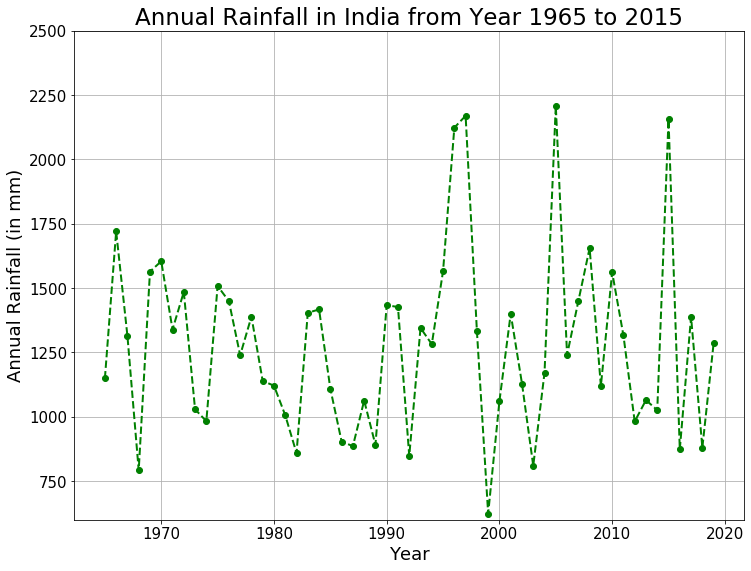

In [9]:
ax = dataset.groupby('Year').mean()['Total'].plot(ylim=(600, 2500), color='g', marker='o', linestyle='--', linewidth=2, figsize=(12, 9))
dataset['RAIN'] = dataset.groupby('Year').mean()['Total'].rolling(10).mean()
dataset.RAIN.plot(color='r', linewidth=4)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Annual Rainfall (in mm)', fontsize=18)
plt.title('Annual Rainfall in India from Year 1965 to 2015', fontsize=23)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

## Creating a list where we store 1 if flood occurred and 0 if it didnt

In [10]:
flood_occ = []

In [11]:
dataset

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0,NaN
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0,NaN
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0,NaN
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0,NaN
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0,NaN
5,1970,0.0,19.0,0.0,5.0,66.0,86.0,495.0,145.0,168.0,171.0,443.0,7.0,1604.0,NaN
6,1971,14.0,0.0,49.0,26.0,45.0,31.0,156.0,44.0,101.0,497.0,266.0,110.0,1339.0,NaN
7,1972,34.0,0.0,0.0,0.0,65.0,127.0,51.0,58.0,111.0,506.0,156.0,377.0,1485.0,NaN
8,1973,0.0,0.0,0.0,0.0,9.0,29.0,73.0,194.0,155.0,261.0,66.0,243.0,1029.0,NaN
9,1974,8.0,0.0,0.0,0.0,26.0,119.0,112.0,138.0,253.0,109.0,217.0,1.0,983.0,NaN


## Iterating through the dataset dataframe and updating the values when floods occured

In [12]:
for i in range(0,55):
     if i == 53 or i == 51 or i == 50 or i == 46 or i == 45 or i ==40 or i == 26:
            flood_occ.append(1)
     else:
        flood_occ.append(0)

In [13]:
flood_occ[0] = 0

In [14]:
len(flood_occ)

55

In [15]:
dataset['Jan-Sept'] = dataset['January'] + dataset['February'] + dataset['March'] + dataset['April'] + dataset['May'] + dataset['June'] + dataset['July'] + dataset['August'] + dataset['September']

In [16]:
dataset.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0,NaN,384.0
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0,NaN,767.0
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0,NaN,684.0
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0,NaN,335.0
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0,NaN,310.0


In [17]:
dataset['October-December'] = dataset['October'] + dataset['November'] + dataset['December']

In [18]:
dataset

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December
0,1965,0.0,11.0,0.0,24.0,0.0,25.0,43.0,186.0,95.0,59.0,422.0,285.0,1149.0,NaN,384.0,766.0
1,1966,1.0,0.0,0.0,76.0,5.0,90.0,153.0,239.0,203.0,310.0,492.0,150.0,1720.0,NaN,767.0,952.0
2,1967,30.0,0.0,97.0,0.0,52.0,97.0,106.0,223.0,79.0,137.0,122.0,372.0,1314.0,NaN,684.0,631.0
3,1968,0.0,0.0,0.0,68.0,0.0,80.0,22.0,14.0,151.0,131.0,140.0,185.0,792.0,NaN,335.0,456.0
4,1969,0.0,0.0,0.0,0.0,15.0,49.0,117.0,119.0,10.0,656.0,420.0,177.0,1564.0,NaN,310.0,1253.0
5,1970,0.0,19.0,0.0,5.0,66.0,86.0,495.0,145.0,168.0,171.0,443.0,7.0,1604.0,NaN,984.0,621.0
6,1971,14.0,0.0,49.0,26.0,45.0,31.0,156.0,44.0,101.0,497.0,266.0,110.0,1339.0,NaN,466.0,873.0
7,1972,34.0,0.0,0.0,0.0,65.0,127.0,51.0,58.0,111.0,506.0,156.0,377.0,1485.0,NaN,446.0,1039.0
8,1973,0.0,0.0,0.0,0.0,9.0,29.0,73.0,194.0,155.0,261.0,66.0,243.0,1029.0,NaN,460.0,570.0
9,1974,8.0,0.0,0.0,0.0,26.0,119.0,112.0,138.0,253.0,109.0,217.0,1.0,983.0,NaN,656.0,327.0


In [19]:
flood_occurence = pd.Series(flood_occ)
dataset['Flood_Occurence'] = flood_occurence.values

In [20]:
dataset[dataset['Year'] == 1991]

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December,Flood_Occurence
26,1991,8.0,0.0,0.0,5.0,0.0,234.0,75.0,107.0,118.0,284.0,594.0,1.0,1426.0,NaN,547.0,879.0,1


In [21]:
dataset[dataset['Year'] == 2005]

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December,Flood_Occurence
40,2005,0.0,0.0,9.0,101.0,32.0,52.0,84.0,119.0,207.0,590.0,514.0,501.0,2208.0,NaN,604.0,1605.0,1


In [22]:
dataset[dataset['Year'] == 2010]

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December,Flood_Occurence
45,2010,2.0,0.0,0.0,0.0,160.0,106.0,269.0,296.0,160.0,147.0,180.0,242.0,1561.0,NaN,993.0,569.0,1


In [23]:
dataset[dataset['Year'] == 2011]

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December,Flood_Occurence
46,2011,2.0,58.0,0.0,35.0,24.0,60.0,85.0,249.0,147.0,167.0,394.0,96.0,1316.0,NaN,660.0,657.0,1


In [24]:
dataset[dataset['Year'] == 1]

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total,RAIN,Jan-Sept,October-December,Flood_Occurence


In [25]:
dataset = dataset.drop(['Year', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis = 1)

In [26]:
import sklearn.utils

In [27]:
dataset = sklearn.utils.shuffle(dataset)
# We do this so that all the flood years do not fall in the test set or vice versa

In [28]:
dataset = dataset.drop(['RAIN'], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [30]:
X = dataset.iloc[:, :3]

In [31]:
X

,Total,Jan-Sept,October-December
51,873.5,620.6,252.8
53,880.1,405.4,474.7
26,1426.0,547.0,879.0
7,1485.0,446.0,1039.0
3,792.0,335.0,456.0
6,1339.0,466.0,873.0
33,1334.0,482.0,852.0
46,1316.0,660.0,657.0
45,1561.0,993.0,569.0
16,1006.0,518.0,489.0


In [32]:
y = dataset.iloc[:, 3:4]

In [33]:
y

,Flood_Occurence
51,1
53,1
26,1
7,0
3,0
6,0
33,0
46,1
45,1
16,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
gnb = GaussianNB()

In [36]:
gnb.fit(X_train, y_train)

D:\ProgramData\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred = gnb.predict(X_test)

In [38]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


I tested the same with logistic regression as well. The accuracy in that case was 81%. So I am keeping keeping the Naive Bayes algorithm.

In [39]:
X_train.drop(['Jan-Sept'], axis = 1)

,Total,October-December
15,1121.0,769.0
48,1064.9,363.1
39,1171.0,577.0
9,983.0,327.0
13,1389.0,870.0
31,2123.0,1085.0
46,1316.0,657.0
1,1720.0,952.0
54,1285.3,643.4
2,1314.0,631.0


In [40]:
y_train

,Flood_Occurence
15,0
48,0
39,0
9,0
13,0
31,0
46,1
1,0
54,0
2,0


### Trying the same thing once again after removing the Jan-Sept column

In [41]:
gnb.fit(X_train, y_train)

D:\ProgramData\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred = gnb.predict(X_test)

In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


### We see no change in accuracy

In [44]:
LR = LogisticRegression()

In [45]:
LR.fit(X_train, y_train)
y_p = LR.predict(X_test)

D:\ProgramData\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_p))

Accuracy: 0.8181818181818182


Pretty sure it is kinda miracuous or it is overfitting. The second one seems more probable. Yeah, there are mistakes from my side, but pheraps if we found a dataset which contained more data entries, maybe the rainfall amount for a hundred years, our model could have been a widely used. Not printing the confusion metrics, as you know what I ll get :)

Finally would say, learned a lot. No matter if selected or not, got a lot of confidence by applying and doing something on my own. Thanks for the opportunity. If selected, would try my best to work on cool projects and learn from seniors. Did the whole thing on my own, so there might be a few NOOB Code snippets. Do have a laugh on them.